<a href="https://colab.research.google.com/github/amungos831/HC-costs-with-regression/blob/main/fcc_predict_HC_regression_am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [89]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-10-03 10:06:16--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2025-10-03 10:06:16 (97.0 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [90]:
df = dataset
print(f"Nr of rows: {len(df)}")
print(f"Nr of columns: {len(df.columns)}")

Nr of rows: 1338
Nr of columns: 7


In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [92]:
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

for column in columns:
    print(f"\n--- {column.upper()} ---")
    print(f"Nr of non-unique: {df[column].nunique()}")
    print(f"Nr of missing values: {df[column].isnull().sum()}")


--- AGE ---
Nr of non-unique: 47
Nr of missing values: 0

--- SEX ---
Nr of non-unique: 2
Nr of missing values: 0

--- BMI ---
Nr of non-unique: 275
Nr of missing values: 0

--- CHILDREN ---
Nr of non-unique: 6
Nr of missing values: 0

--- SMOKER ---
Nr of non-unique: 2
Nr of missing values: 0

--- REGION ---
Nr of non-unique: 4
Nr of missing values: 0

--- EXPENSES ---
Nr of non-unique: 1337
Nr of missing values: 0


In [93]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [118]:
print(df.head())

   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86


In [95]:
feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_column = 'expenses'

In [96]:
X = df[feature_columns]
y = df[target_column]

train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, train_size=0.8)

In [97]:
print(f"train dataset: {train_dataset.shape}")
print(f"test dataset: {test_dataset.shape}")
print(f"train labels: {train_labels.shape}")
print(f"test labels: {test_labels.shape}")

train dataset: (1070, 6)
test dataset: (268, 6)
train labels: (1070,)
test labels: (268,)


In [105]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_dataset.shape[1],)),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss='mse',
    metrics=['mae', 'mape']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = model.fit(
    train_dataset, train_labels,
    epochs=200,
    batch_size=32,
    validation_data=(test_dataset, test_labels),
    verbose=1
)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35904644.0000 - mae: 3821.7151 - mape: 33.4520 - val_loss: 28437812.0000 - val_mae: 3183.1125 - val_mape: 26.7207
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35394488.0000 - mae: 3798.7910 - mape: 34.0412 - val_loss: 29000418.0000 - val_mae: 3384.5129 - val_mape: 29.0594
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33881176.0000 - mae: 3663.3640 - mape: 35.6069 - val_loss: 28200060.0000 - val_mae: 3595.7708 - val_mape: 35.5838
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40701092.0000 - mae: 4200.8315 - mape: 39.6436 - val_loss: 28019062.0000 - val_mae: 3299.2402 - val_mape: 29.0067
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33329560.0000 - mae: 3671.7244 - mape: 36.5264 - val_loss: 28117942.0000 - val_mae: 3277.7878 - val_mape: 28.6533
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36376864.0000 - mae: 3796.3699 - mape: 35.2981 - val_loss: 27860530.0000 - v

In [119]:
test_loss, test_mae, test_mape = model.evaluate(test_dataset, test_labels, verbose=0)
print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

Test Loss (MSE): 23172260.00
Test MAE: 2656.11
Test MAPE: 22.85%


9/9 - 0s - 5ms/step - loss: 23172260.0000 - mae: 2656.1086 - mape: 22.8477
Testing set Mean Abs Error: 2656.11 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


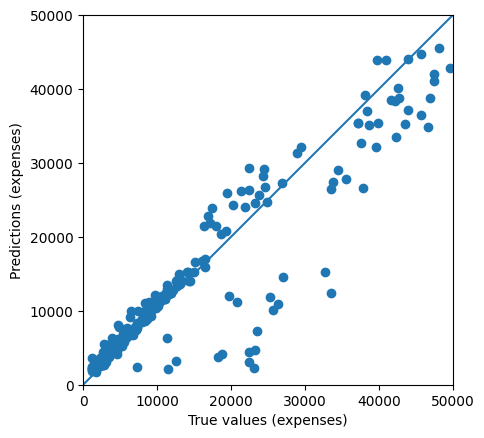

In [120]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)